# Image Recommendation System Using Autoencoder

This Jupyter notebook demonstrates the process of building an image recommendation system using an autoencoder. The autoencoder is trained to learn latent features from images, which are then used to create feature vectors. These feature vectors serve as the basis for recommending similar images. The notebook covers the following steps:

1. Importing necessary libraries and defining utility functions.
2. Setting configuration variables for data directories, batch size, image size, and other parameters.
3. Preparing data generators for training and testing images.
4. Building and training the autoencoder model to learn latent features.
5. Saving the trained model for later use in the recommendation system.
6. Plotting the training and validation loss to evaluate the model's performance.

The latent features extracted by the encoder part of the autoencoder are used to create feature vectors that represent the content of the images. These feature vectors are then utilized to find and recommend similar images based on their content similarity.


In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models

Define three functions:
1. `create_data_generator`: Creates an image data generator for loading images from a directory.
2. `create_autoencoder_generator`: Yields pairs of images for training the autoencoder.
3. `build_autoencoder`: Builds an autoencoder model with a specified input shape.


In [7]:

def create_data_generator(image_directory, batch_size, image_size):
    datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
    generator = datagen.flow_from_directory(
        directory=image_directory,
        target_size=image_size,
        color_mode='rgb',
        batch_size=batch_size,
        class_mode=None,  # No labels needed
        shuffle=True
    )
    return generator

def create_autoencoder_generator(image_generator):
    for batch in image_generator:
        yield (batch, batch)

def build_autoencoder(input_shape):
    # Encoder
    encoder = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu')  # Latent representation (1D vector)
    ])
    
    # Decoder
    decoder = models.Sequential([
        layers.Dense(64, activation='relu', input_shape=(32,)),
        layers.Dense(128, activation='relu'),
        layers.Dense(input_shape[0] * input_shape[1] * input_shape[2], activation='sigmoid'),
        layers.Reshape(input_shape)
    ])
    
    # Autoencoder
    autoencoder = models.Sequential([encoder, decoder])
    
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    
    return autoencoder


Set configuration variables for the data directories, batch size, image size, number of epochs, and model path.


In [10]:
train_directory="../backend/data/Train/"
test_directory="../backend/data/Test/"
batch_size=64
image_size=tuple([32, 32])
epochs=25
model_path="../backend/model/encoder_model.keras"

1. Create data generators for training and testing data.
2. Create autoencoder generators for the training and testing data.
3. Build the autoencoder model.
4. Train the autoencoder model with the training data and validate it with the testing data.

In [12]:

# Create the data generators
train_generator = create_data_generator(train_directory, batch_size, image_size)
test_generator = create_data_generator(test_directory, batch_size, image_size)

# Create the autoencoder generator
autoencoder_train_generator = create_autoencoder_generator(train_generator)
autoencoder_test_generator = create_autoencoder_generator(test_generator)

# Build the autoencoder
autoencoder = build_autoencoder(input_shape=image_size + (3,))  # 3 channels for RGB

# Train the autoencoder
history=autoencoder.fit(
    autoencoder_train_generator,
    steps_per_epoch=len(train_generator),
    validation_data=autoencoder_test_generator,
    validation_steps=len(test_generator),
    epochs=epochs
)

    # Save the model


Found 35510 images belonging to 1 classes.
Found 8876 images belonging to 1 classes.
Epoch 1/25
555/555 [==============================] - 574s 1s/step - loss: 0.2795 - val_loss: 0.2377
Epoch 2/25
555/555 [==============================] - 559s 1s/step - loss: 0.2295 - val_loss: 0.2258
Epoch 3/25
555/555 [==============================] - 555s 1s/step - loss: 0.2204 - val_loss: 0.2193
Epoch 4/25
555/555 [==============================] - 548s 988ms/step - loss: 0.2155 - val_loss: 0.2157
Epoch 5/25
555/555 [==============================] - 545s 984ms/step - loss: 0.2122 - val_loss: 0.2128
Epoch 6/25
555/555 [==============================] - 520s 938ms/step - loss: 0.2100 - val_loss: 0.2105
Epoch 7/25
555/555 [==============================] - 505s 911ms/step - loss: 0.2085 - val_loss: 0.2094
Epoch 8/25
555/555 [==============================] - 453s 817ms/step - loss: 0.2072 - val_loss: 0.2091
Epoch 9/25
555/555 [==============================] - 442s 798ms/step - loss: 0.2061 - val_l

Save the trained autoencoder model to the specified path.

In [16]:
autoencoder.save(model_path)


Plot the training and validation loss values to visualize the model's performance over epochs.

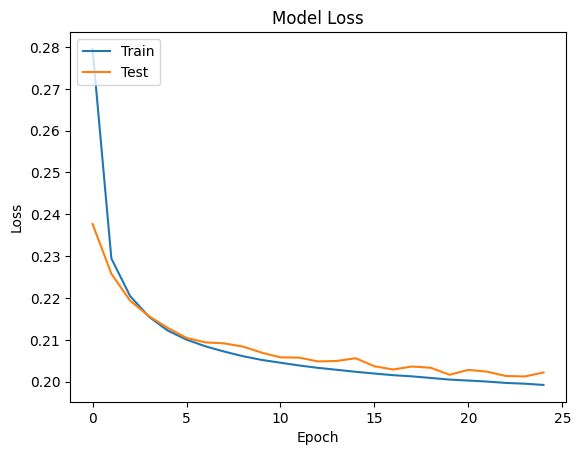

In [15]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()